In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'Name': ['John', 'Alice', 'Bob', 'John'],
                   'Alter': [28, 25, 22, 35],
                   'Stadt': ['Berlin', 'Hamburg', 'Hamburg', 'München']})
df

,Name,Alter,Stadt
0,John,28,Berlin
1,Alice,25,Hamburg
2,Bob,22,Hamburg
3,John,35,München


In [ ]:
mask = [True, False, True, False] # Boolesche Maske

df[mask]

,Name,Alter,Stadt
0,John,28,Berlin
2,Bob,22,Hamburg


In [6]:
df["Stadt"] == "Hamburg"

0    False
1     True
2     True
3    False
Name: Stadt, dtype: bool

In [7]:
df[df["Stadt"] == "Hamburg"]

,Name,Alter,Stadt
1,Alice,25,Hamburg
2,Bob,22,Hamburg


In [8]:
df[df["Alter"] > 30]

,Name,Alter,Stadt
3,John,35,München


In [14]:
df_books = pd.read_csv("bookstore.csv")

df_books[df_books["Sale Price"].min() == df_books["Sale Price"]]

,Title,Author,Publication Year,List Price,Sale Price,Condition
9,Pope Joan,"Cross, Donna W.",2003,24.95,0.99,like new
10,Inkheart,"Funke, Cornelia",2005,9.99,0.99,like new


In [19]:
df_books[['Condition', 'Sale Price', 'List Price']].groupby("Condition").mean()

,Sale Price,List Price
Condition,,
good,2.123333,13.310000
like new,1.471818,10.663636
very good,1.577500,12.071875


In [22]:
pd.crosstab(
    index=df_books["Publication Year"],
    columns=df_books["Condition"], 
    values=df_books["Sale Price"], 
    aggfunc="sum",
)

Condition,good,like new,very good
Publication Year,,,
1978,NaN,NaN,1.49
1987,NaN,NaN,1.29
1992,NaN,2.69,NaN
1994,NaN,NaN,1.29
1995,NaN,NaN,1.99
1996,NaN,NaN,1.29
1998,NaN,1.29,1.29
1999,NaN,1.29,NaN
2000,NaN,1.29,1.29


In [23]:
def zeiteinteilung(year):
    if year < 1990:
        return "sehr alt"
    if year < 2000:
        return "alt"
    if year < 2025:
        return "neu"
    return "noch nicht erschienen"

df_books["Zeiteinteilung"] = df_books["Publication Year"].apply(zeiteinteilung)
df_books

,Title,Author,Publication Year,List Price,Sale Price,Condition,Zeiteinteilung
0,The Lord of the Rings,"Tolkien, J.R.R.",1992,7.99,2.69,like new,alt
1,The Bible,International Bible Society,2003,7.50,2.49,like new,neu
2,The Pillars of the Earth,"Follett, Ken",2002,19.95,1.49,very good,neu
3,Perfume: The Story of a Murderer,"Süskind, Patrick",2003,19.95,1.29,very good,neu
4,The Little Prince,"Saint-Exupéry, Antoine de",2006,24.95,2.59,good,neu
5,Buddenbrooks,"Mann, Thomas",2001,7.99,1.99,very good,neu
6,The Physician,"Gordon, Noah",2003,25.95,1.29,like new,neu
7,The Alchemist,"Coelho, Paulo",1999,7.50,1.29,like new,alt
8,Harry Potter and the Sorcerer’s Stone,"Rowling, J.K.",2006,7.99,2.49,very good,neu
9,Pope Joan,"Cross, Donna W.",2003,24.95,0.99,like new,neu


<Axes: >

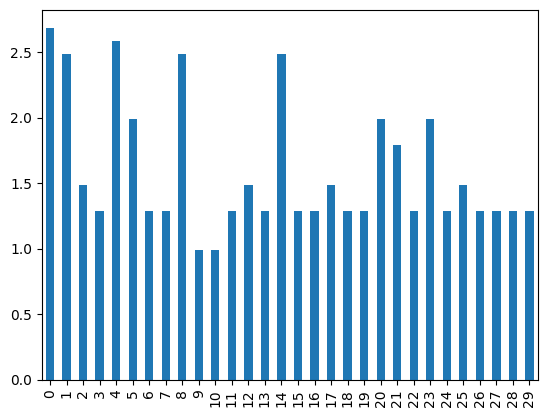

In [28]:
import matplotlib as plt
df_books["Sale Price"].plot(kind="bar")